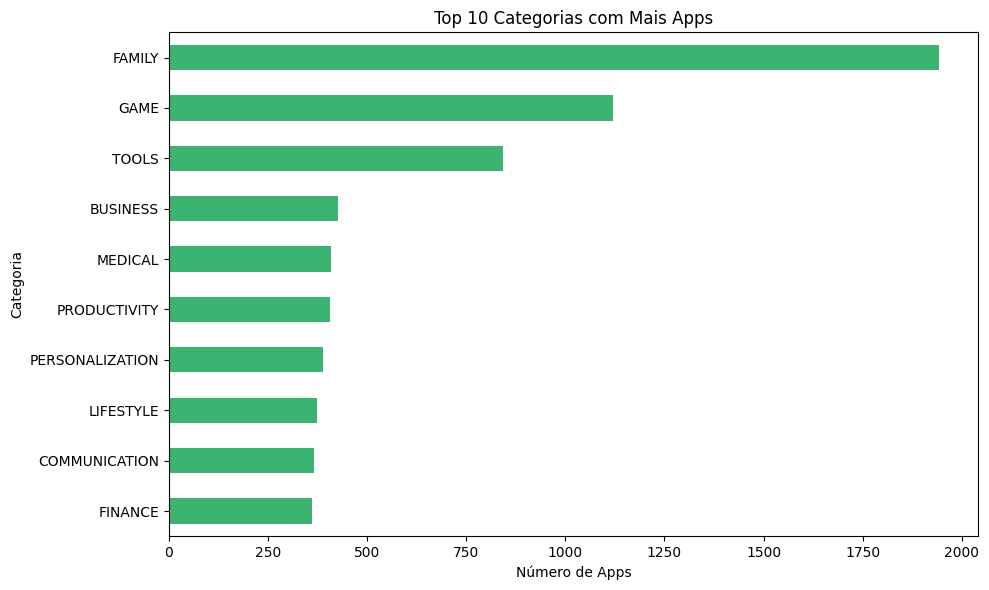

C:\Users\Fernando\AppData\Local\Temp\ipykernel_4512\3353292009.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_duplicatas['Size'] = df_sem_duplicatas['Size'].replace('Varies with device', pd.NA)
C:\Users\Fernando\AppData\Local\Temp\ipykernel_4512\3353292009.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_duplicatas['Size_MB'] = df_sem_duplicatas['Size'].str.replace('M', '')
C:\Users\Fernando\AppData\Local\Temp\ipykernel_4512\3353292009.py:34: SettingWithCopyWarning: 
A value is tryin

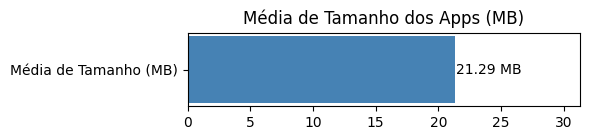

In [1]:
# Importa as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Lê o arquivo CSV para um DataFrame do pandas
df = pd.read_csv('googleplaystore.csv')

# Remove as linhas duplicadas com base em todas as colunas
df_sem_duplicatas = df.drop_duplicates()

# Top 10 categorias com mais apps
# Conta quantos apps existem por categoria
categorias_top10 = df_sem_duplicatas['Category'].value_counts().head(10)

# Gráfico 1 - Top 10 categorias com mais apps (barra horizontal)
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
categorias_top10.plot(kind='barh', color='mediumseagreen')  # Gráfico de barras horizontais
# Adiciona título e rótulos aos eixos
plt.title('Top 10 Categorias com Mais Apps')
plt.xlabel('Número de Apps')
plt.ylabel('Categoria')
# Inverte o eixo Y para mostrar o mais popular no topo
plt.gca().invert_yaxis()
# Ajusta layout e exibe
plt.tight_layout()
plt.show()

# Média do tamanho dos apps
# Substitui 'Varies with device' por NaN (não disponível)
df_sem_duplicatas['Size'] = df_sem_duplicatas['Size'].replace('Varies with device', pd.NA)

# Remove os caracteres 'M' e 'k', convertendo os valores para MB
df_sem_duplicatas['Size_MB'] = df_sem_duplicatas['Size'].str.replace('M', '')
df_sem_duplicatas['Size_MB'] = df_sem_duplicatas['Size_MB'].str.replace('k', '')
df_sem_duplicatas['Size_MB'] = pd.to_numeric(df_sem_duplicatas['Size_MB'], errors='coerce')

# Converte os tamanhos originalmente em kilobytes (k) para MB (dividindo por 1024)
df_sem_duplicatas.loc[df_sem_duplicatas['Size'].str.contains('k', na=False), 'Size_MB'] /= 1024

# Cálculo da média
media_tamanho_mb = df_sem_duplicatas['Size_MB'].mean()

# Gráfico 2 - Média de tamanho dos apps em MB (barra única)
plt.figure(figsize=(6, 1.5))  # Figura mais larga e baixa, estilo "medidor"
plt.barh(['Média de Tamanho (MB)'], [media_tamanho_mb], color='steelblue')
# Adiciona valores diretamente no gráfico
plt.text(media_tamanho_mb + 0.1, 0, f'{media_tamanho_mb:.2f} MB', va='center')
# Adiciona título e ajusta layout
plt.title('Média de Tamanho dos Apps (MB)')
plt.xlim(0, media_tamanho_mb + 10)  # Ajusta o eixo X para deixar espaço
plt.tight_layout()
plt.show()
